IMLP350 Final Project: Taipei Housing Prices Regression Analysis

We need to find out sales price per unit based on all the other features. 
Here we are going to select the most relevant features that our price movement is dependent on.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('A_lvr_land_A_2021_Q1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6543 entries, 0 to 6542
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   鄉鎮市區           6543 non-null   object 
 1   交易標的           6543 non-null   object 
 2   土地位置建物門牌       6543 non-null   object 
 3   土地移轉總面積平方公尺    6543 non-null   object 
 4   都市土地使用分區       6480 non-null   object 
 5   非都市土地使用分區      1 non-null      object 
 6   非都市土地使用編定      1 non-null      object 
 7   交易年月日          6543 non-null   object 
 8   交易筆棟數          6543 non-null   object 
 9   移轉層次           6074 non-null   object 
 10  總樓層數           6061 non-null   object 
 11  建物型態           6543 non-null   object 
 12  主要用途           5928 non-null   object 
 13  主要建材           6071 non-null   object 
 14  建築完成年月         5600 non-null   object 
 15  建物移轉總面積平方公尺    6543 non-null   object 
 16  建物現況格局-房       6543 non-null   object 
 17  建物現況格局-廳       6543 non-null   object 
 18  建物現況格局-衛

In [3]:
df.isnull().sum()

鄉鎮市區                0
交易標的                0
土地位置建物門牌            0
土地移轉總面積平方公尺         0
都市土地使用分區           63
非都市土地使用分區        6542
非都市土地使用編定        6542
交易年月日               0
交易筆棟數               0
移轉層次              469
總樓層數              482
建物型態                0
主要用途              615
主要建材              472
建築完成年月            943
建物移轉總面積平方公尺         0
建物現況格局-房            0
建物現況格局-廳            0
建物現況格局-衛            0
建物現況格局-隔間           0
有無管理組織              0
總價元                 0
單價元平方公尺           284
車位類別             4145
車位移轉總面積(平方公尺)       0
車位總價元               0
備註               2617
編號                  0
主建物面積               1
附屬建物面積              1
陽台面積                1
電梯                  1
移轉編號             4723
dtype: int64

In [4]:
# dropping unecessary columns
df.drop('非都市土地使用分區', axis = 1, inplace = True)
df.drop('非都市土地使用編定', axis = 1, inplace = True)
df.drop('交易筆棟數', axis = 1, inplace = True)
df.drop('建物現況格局-房', axis = 1, inplace = True)
df.drop('建物現況格局-廳', axis = 1, inplace = True)
df.drop('建物現況格局-衛', axis = 1, inplace = True)
df.drop('建物現況格局-隔間', axis = 1, inplace = True)
df.drop('有無管理組織', axis = 1, inplace = True)
df.drop('車位類別', axis = 1, inplace = True)
df.drop('車位移轉總面積(平方公尺)', axis = 1, inplace = True)
df.drop('車位總價元', axis = 1, inplace = True)
df.drop('編號', axis = 1, inplace = True)
df.drop('主建物面積', axis = 1, inplace = True)
df.drop('附屬建物面積', axis = 1, inplace = True)
df.drop('陽台面積', axis = 1, inplace = True)
df.drop('移轉編號', axis = 1, inplace = True)
df.drop('備註', axis = 1, inplace = True)

# disregarding parking space and building-only transactions since we're only considering land+building prices
df = df[df.交易標的 != '車位']
df = df[df.交易標的 != '建物']

df['都市土地使用分區'] = df['都市土地使用分區'].replace(np.nan, '車位', regex=True)

In [5]:
# Transforming dates to datetime format
# first droping the english translation of column title
df = df.drop([0,0])

df['交易年月日'] = df['交易年月日'].astype(int) + 19110000
#df['交易年月日'] = pd.to_datetime(df['交易年月日'], format='%Y%m%d') - pd.datetime(1970,1,1)
#df['交易年月日'] = df['交易年月日'].astype(str)
#df['交易年月日'] = df['交易年月日'].str.replace(r'\D', '')
#df['交易年月日'] = df['交易年月日'].astype(int)

print(df['交易年月日'])
print (df['交易年月日'].dtypes)

1       20201029
2       20201105
4       20201123
5       20180309
6       20180407
          ...   
6537    20210115
6538    20210126
6539    20210121
6540    20210127
6542    20180328
Name: 交易年月日, Length: 6225, dtype: int32
int32


In [6]:
# we do the same for comeplete date of the building

df['建築完成年月'].fillna('0590101', inplace=True)
df['建築完成年月'] = df['建築完成年月'].astype(int) + 19110000
#df['建築完成年月'] = pd.to_datetime(df['建築完成年月'], format='%Y%m%d') - pd.datetime(1970,1,1)
#df['建築完成年月'] = df['建築完成年月'].astype(str)
#df['建築完成年月'] = df['建築完成年月'].str.replace(r'\D', '')
#df['建築完成年月'] = df['建築完成年月'].astype(int)

print(df['建築完成年月'])

1       19960715
2       19870413
4       19700101
5       20200825
6       20200825
          ...   
6537    19700101
6538    19980213
6539    19700101
6540    19700101
6542    20200710
Name: 建築完成年月, Length: 6225, dtype: int32


In [7]:
df['交易標的'].value_counts()

房地(土地+建物)       3719
房地(土地+建物)+車位    2107
土地               399
Name: 交易標的, dtype: int64

In [8]:
df = df[df.交易標的 != '車位']
df = df[df.交易標的 != '建物']

In [9]:
df['主要建材'].value_counts()

鋼筋混凝土造        5099
加強磚造           278
見其他登記事項        179
鋼骨鋼筋混凝土造       167
鋼骨造             43
磚造              19
見使用執照           15
鋼骨混凝土造           7
木造               4
土造               4
預力混凝土造           2
壁式預鑄鋼筋混凝土造       2
鐵造               1
土木造              1
石造               1
鋼骨ＲＣ造            1
Name: 主要建材, dtype: int64

In [10]:
df['主要用途'].value_counts()

住家用                            4005
見其他登記事項                         904
商業用                             478
見使用執照                            78
集合住宅                             60
工業用                              58
住商用                              35
（Ｈ２）集合住宅，第二組：多戶住宅                16
一般事務所                            11
（Ｈ２）集合住宅                         11
多戶住宅、住宅                           6
策略性產業（Ｇ２）（資訊服務業）                  2
農舍                                2
策略性產業（資訊服務業）                      2
金融保險業（不含銀行、合作社）                   1
員工宿舍                              1
一般零售業甲乙組，（Ｇ３）                     1
國民住宅                              1
一般事務所（Ｇ－２）                        1
地下室                               1
餐廳、地下室、防空避難室                      1
多戶住宅                              1
商店、變電室、防空避難室                      1
策略型產業、（供第一目：資訊服務業使用）              1
Ｈ－２類第２組多戶住宅                       1
一般零售業（甲組及乙組）                      1
一般零售業甲組                           1
一般零售業甲組（除便利商店以外）            

In [11]:
df['主要建材'].fillna(df.主要建材.mode()[0], inplace=True)
df['移轉層次'].fillna('土地', inplace=True)
df['總樓層數'].fillna('土地', inplace=True)
df['主要用途'].fillna('其他', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 1 to 6542
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   鄉鎮市區         6225 non-null   object
 1   交易標的         6225 non-null   object
 2   土地位置建物門牌     6225 non-null   object
 3   土地移轉總面積平方公尺  6225 non-null   object
 4   都市土地使用分區     6225 non-null   object
 5   交易年月日        6225 non-null   int32 
 6   移轉層次         6225 non-null   object
 7   總樓層數         6225 non-null   object
 8   建物型態         6225 non-null   object
 9   主要用途         6225 non-null   object
 10  主要建材         6225 non-null   object
 11  建築完成年月       6225 non-null   int32 
 12  建物移轉總面積平方公尺  6225 non-null   object
 13  總價元          6225 non-null   object
 14  單價元平方公尺      6225 non-null   object
 15  電梯           6225 non-null   object
dtypes: int32(2), object(14)
memory usage: 778.1+ KB


In [25]:
import sweetviz as sv

report = sv.analyze(df)

report.show_html("./report.html")

                                             |          | [  0%]   00:00 -> (? left)

C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23433 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: Runtim

C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36554 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22303 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: Runtim

C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20854 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20182 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23507 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27155 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: Runtim

C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35211 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22519 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29031 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: Runtim

C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35211 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20854 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20182 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30331 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: Runtim

C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28961 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 28961 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28961 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWar

C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28961 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 28961 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28961 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWar

Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# label encoder
df['鄉鎮市區'] = le.fit_transform(df['鄉鎮市區'])
df['交易標的'] = le.fit_transform(df['交易標的'])
df['都市土地使用分區'] = le.fit_transform(df['都市土地使用分區'])
df['建物型態'] = le.fit_transform(df['建物型態'])
df['主要用途'] = le.fit_transform(df['主要用途'])
df['土地位置建物門牌'] = le.fit_transform(df['土地位置建物門牌'])
df['移轉層次'] = le.fit_transform(df['移轉層次'])
df['總樓層數'] = le.fit_transform(df['總樓層數'])
df['主要建材'] = le.fit_transform(df['主要建材'])
df['電梯'] = le.fit_transform(df['電梯'])

# transforming to numerical
df['土地位置建物門牌'] = df['土地位置建物門牌'].astype(int)
df['土地移轉總面積平方公尺'] = df['土地移轉總面積平方公尺'].astype(float)
df['移轉層次'] = df['移轉層次'].astype(int)
df['總樓層數'] = df['總樓層數'].astype(int)
df['建物型態'] = df['建物型態'].astype(int)
df['主要用途'] = df['主要用途'].astype(int)
df['主要建材'] = df['主要建材'].astype(int)
df['總樓層數'] = df['總樓層數'].astype(int)
df['建物移轉總面積平方公尺'] = df['建物移轉總面積平方公尺'].astype(float)
df['總價元'] = df['總價元'].astype(int)
df['單價元平方公尺'] = df['單價元平方公尺'].astype(int)
df['電梯'] = df['電梯'].astype(int)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 1 to 6542
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   鄉鎮市區         6225 non-null   int32  
 1   交易標的         6225 non-null   int32  
 2   土地位置建物門牌     6225 non-null   int32  
 3   土地移轉總面積平方公尺  6225 non-null   float64
 4   都市土地使用分區     6225 non-null   int32  
 5   交易年月日        6225 non-null   int32  
 6   移轉層次         6225 non-null   int32  
 7   總樓層數         6225 non-null   int32  
 8   建物型態         6225 non-null   int32  
 9   主要用途         6225 non-null   int32  
 10  主要建材         6225 non-null   int32  
 11  建築完成年月       6225 non-null   int32  
 12  建物移轉總面積平方公尺  6225 non-null   float64
 13  總價元          6225 non-null   int32  
 14  單價元平方公尺      6225 non-null   int32  
 15  電梯           6225 non-null   int32  
dtypes: float64(2), int32(14)
memory usage: 486.3 KB


In [15]:
df.head(30)

,鄉鎮市區,交易標的,土地位置建物門牌,土地移轉總面積平方公尺,都市土地使用分區,交易年月日,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,總價元,單價元平方公尺,電梯
1,9,1,4987,8.65,142,20201029,63,25,0,8,9,19960715,40.99,7300000,178092,0
2,9,1,1330,86.00,157,20201105,73,34,6,8,9,19870413,175.72,24500000,139426,1
4,9,1,5010,33.62,142,20201123,114,34,1,8,9,19700101,106.21,11700000,110159,1
5,9,1,4922,9.13,142,20180309,74,32,4,25,9,20200825,44.01,9000000,204499,0
6,9,2,4919,9.63,142,20180407,39,32,4,28,9,20200825,87.50,11350000,207712,0
7,9,1,4928,9.13,142,20180321,56,32,4,25,9,20200825,43.55,7970000,183008,0
8,9,2,4932,9.63,142,20180310,114,32,4,25,9,20200825,84.06,10550000,191690,0
9,9,2,4936,20.28,142,20180503,56,32,4,25,9,20200825,144.72,21400000,186563,0
10,9,2,4934,20.28,142,20180329,30,32,4,25,9,20200825,144.59,21500000,190779,0
11,9,1,4940,19.77,142,20180317,114,32,4,25,9,20200825,100.91,19500000,193242,0


C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22303 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32622 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24314 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Oliver.Chen\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: Runtim

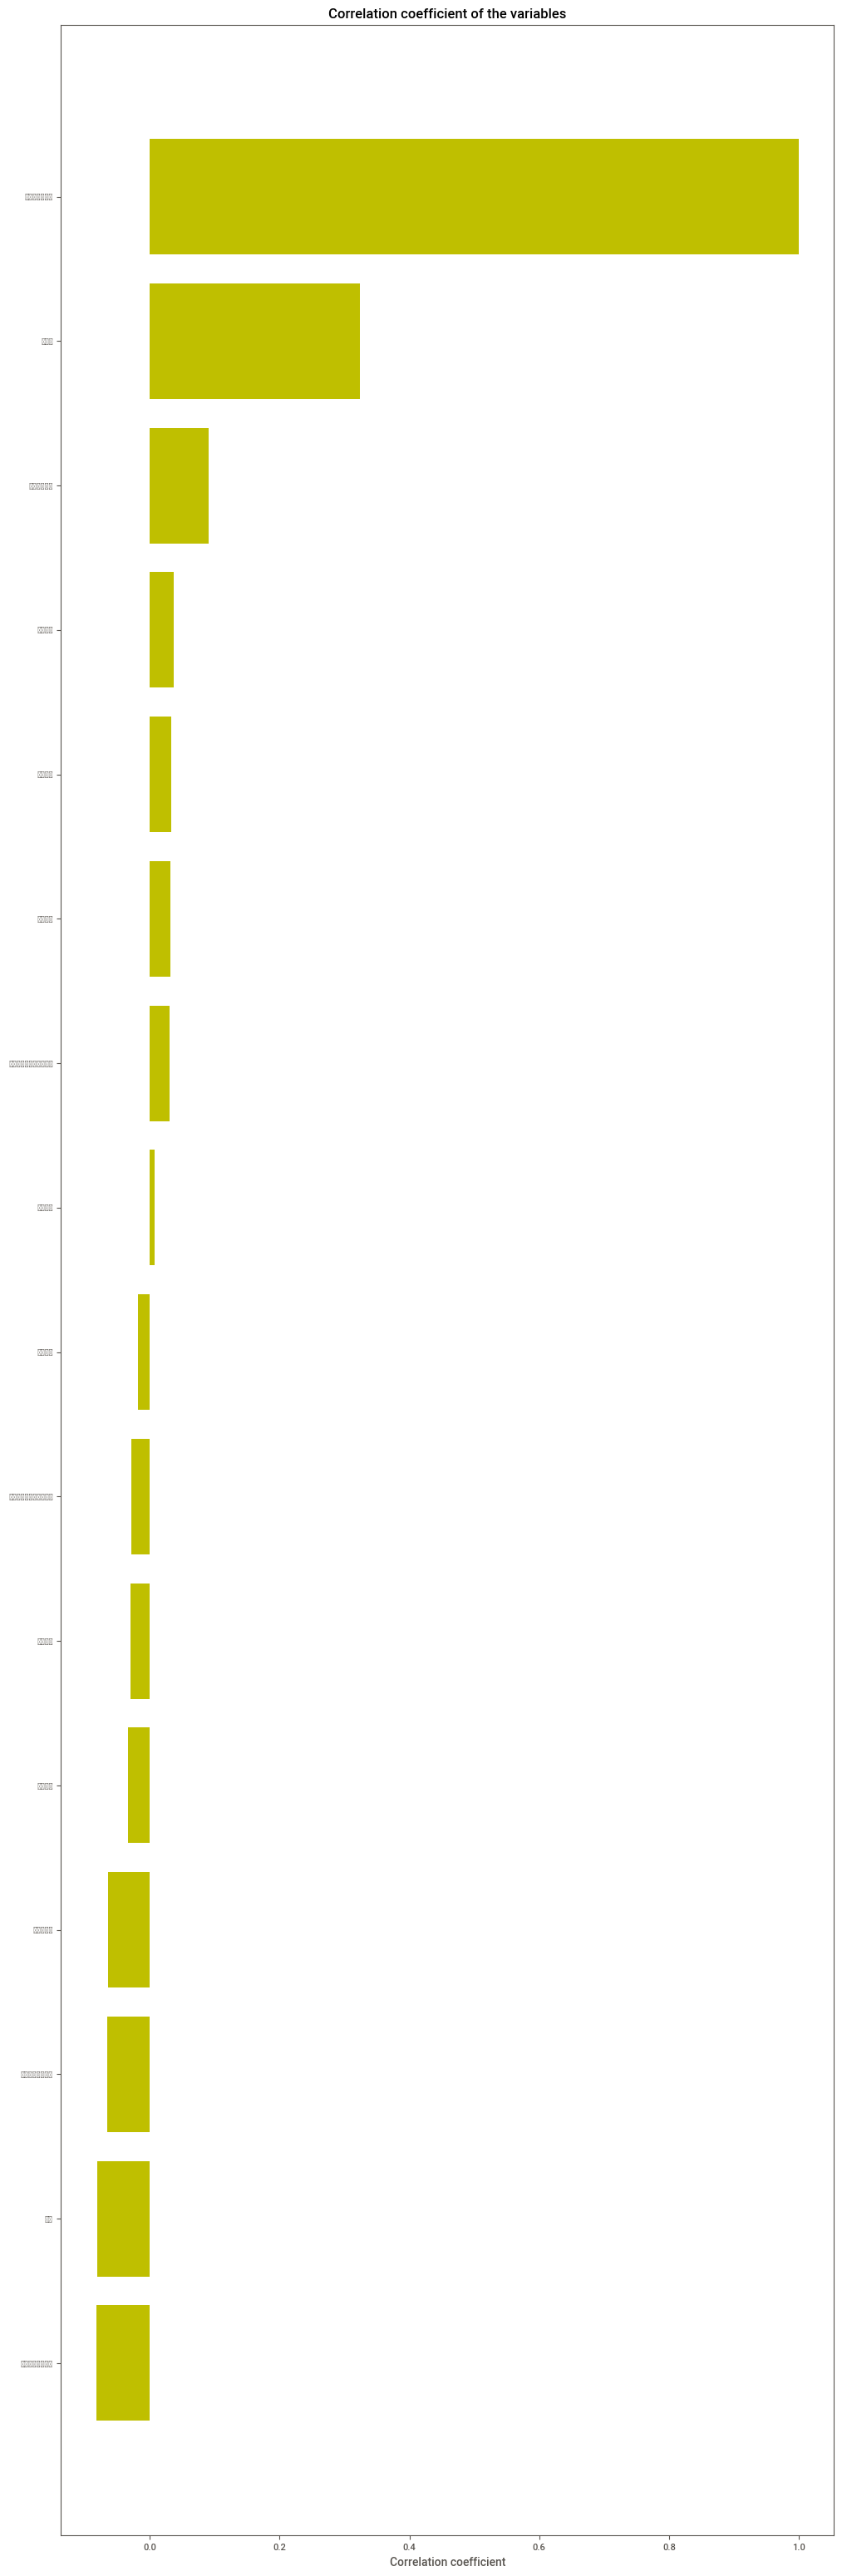

In [21]:
# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in df.columns if df[col].dtype == 'float64' or 'int32']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.單價元平方公尺)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

In [22]:
print(corr_df.col_labels.values)

['土地位置建物門牌' '電梯' '都市土地使用分區' '交易年月日' '主要建材' '總樓層數' '土地移轉總面積平方公尺' '鄉鎮市區'
 '移轉層次' '建物移轉總面積平方公尺' '建物型態' '交易標的' '主要用途' '建築完成年月' '總價元' '單價元平方公尺']


In [16]:
y = df.iloc[:,-2].values

df.drop(labels = ['單價元平方公尺'], axis = 1)

X = df.iloc[:,:].values

In [17]:
from sklearn.model_selection import train_test_split
import datetime

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
#Verification / model prediction

y_pred = model.predict(X_test)

In [20]:
# model accuracy, how well our model is performing

from sklearn.metrics import r2_score

r2_score = r2_score(y_test, y_pred)
print('r2 score:', "{:.3%}".format(r2_score))

r2 score: 99.700%
